In [7]:
from Exploration import RandomExploration
from Environment import get_environment
from habitat.utils.visualizations import maps
import matplotlib.pyplot as plt
import numpy as np
import cv2
import torch

In [2]:
sim = 'habitat'
config_path = 'configs/tasks/pointnav_gibson.yaml'
steps = 1000
env = get_environment(sim, config_path)

2022-09-16 13:27:23,298 Initializing dataset PointNav-v1
2022-09-16 13:27:25,021 initializing sim Sim-v0
I0916 13:27:28.923146 132741 simulator.py:221] Loaded navmesh data/scene_datasets/gibson/Roxboro.navmesh
2022-09-16 13:27:28,961 Initializing task Nav-v0


In [12]:
for i in range(10):
    env.reset()
    first_pos = torch.tensor(env.sim.get_agent_state().position)
    print(first_pos)
    action = env.action_space.sample()
    print(action)
    env.step(action)
    second_pos = torch.tensor(env.sim.get_agent_state().position)
    print(second_pos)
    print((first_pos - second_pos).pow(2).sum())
    print('/n')

tensor([-5.0345,  0.1596,  5.2344])
{'action': 'MOVE_BACKWARD', 'action_args': None}
tensor([-5.0976,  0.1596,  5.0569])
tensor(0.0355)
tensor([0.4099, 0.1596, 4.1129])
{'action': 'MOVE_FORWARD', 'action_args': None}
tensor([0.6569, 0.1596, 4.1515])
tensor(0.0625)
tensor([-3.1003,  0.1596,  3.1622])
{'action': 'MOVE_RIGHT', 'action_args': None}
tensor([-2.8560,  0.1596,  3.1092])
tensor(0.0625)
tensor([2.9079, 0.1596, 1.2775])
{'action': 'MOVE_LEFT', 'action_args': None}
tensor([2.6684, 0.1596, 1.3493])
tensor(0.0625)
tensor([-4.8967,  0.1596,  2.7545])
{'action': 'MOVE_RIGHT', 'action_args': None}
tensor([-5.0976,  0.1596,  2.8531])
tensor(0.0501)
tensor([-3.8355,  0.1596,  2.8392])
{'action': 'MOVE_RIGHT', 'action_args': None}
tensor([-3.9292,  0.1596,  3.0709])
tensor(0.0625)
tensor([-2.3480,  0.1596,  3.7530])
{'action': 'TURN_RIGHT', 'action_args': None}
tensor([-2.3480,  0.1596,  3.7530])
tensor(0.)
tensor([-1.8879,  0.1596,  3.7597])
{'action': 'MOVE_RIGHT', 'action_args': None}

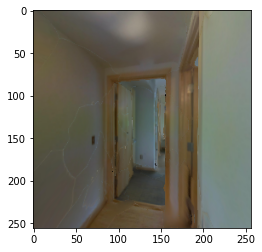

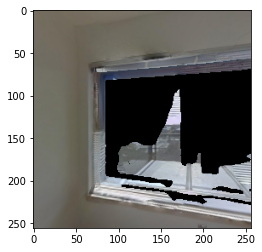

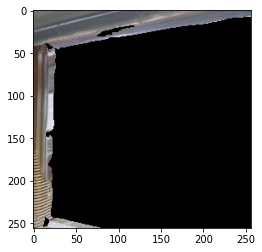

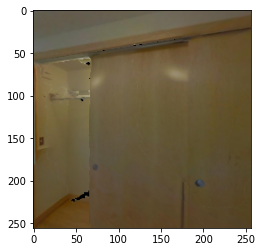

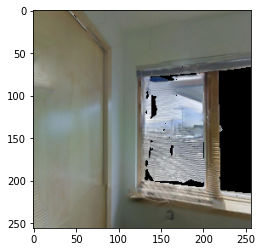

0.0


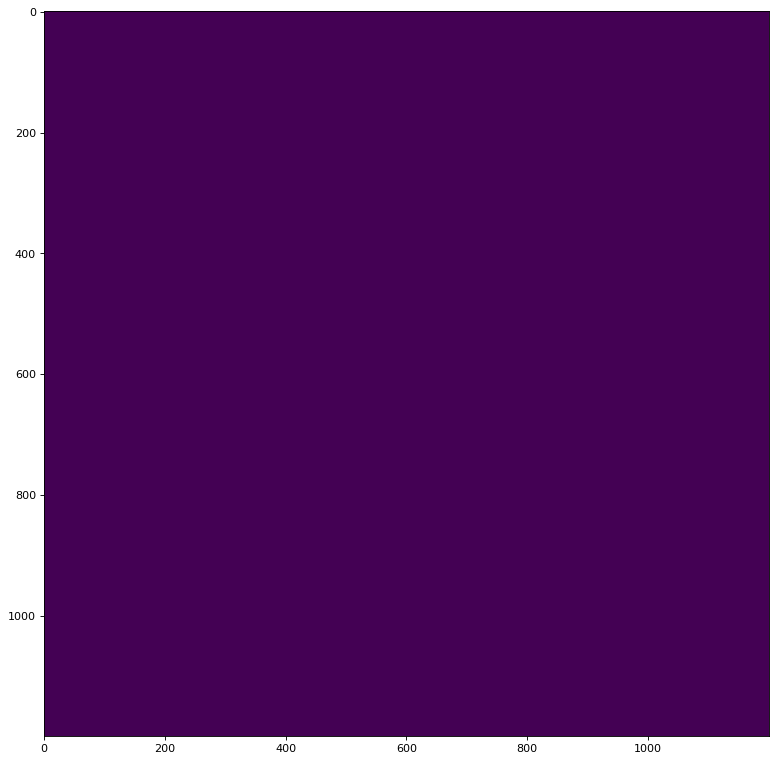

In [12]:
meters_per_pixel = maps.calculate_meters_per_pixel(map_resolution=1024, pathfinder=env.sim.pathfinder)
X = []
Y = []
seen_map = np.zeros((1200, 1200))
for i in range(5):
    initial_loc = env.sim.sample_navigable_point()
    agent_state = env.sim.get_agent_state()
    agent_state.position = initial_loc
    env.sim.get_agent(0).set_state(agent_state)
    # final_loc = env.sim.sample_navigable_point()
    
    plt.imshow(env.render(mode='rgb'))
    plt.show()
    # pos = env.sim.sample_navigable_point() - env.sim.pathfinder.get_bounds()[0]
    # X.append(int(pos[0] / meters_per_pixel))
    # Y.append(int(pos[2] / meters_per_pixel))
    # # print(X[-1], Y[-1])
    # cv2.circle(seen_map, (X[-1], Y[-1]), 3, 1, 10)
    # # seen_map[X[-1], Y[-1]] = 1

print(seen_map.sum())
plt.figure(figsize=(12, 12), dpi=80)
plt.imshow(seen_map)
plt.show()

In [3]:
env.sim.get_agent_state()


AgentState(position=array([-4.8458514 ,  0.15964921,  2.8111553 ], dtype=float32), rotation=quaternion(0.930709660053253, 0, 0.365758806467056, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([-4.8458514,  1.4096493,  2.8111553], dtype=float32), rotation=quaternion(0.930709660053253, 0, 0.365758806467056, 0))})

In [7]:
meters_per_pixel = maps.calculate_meters_per_pixel(map_resolution=1024, pathfinder=env.sim.pathfinder)
print(meters_per_pixel)

0.007892060093581676


In [8]:
env.sim.pathfinder.get_bounds()

(array([-5.247636  , -0.04035079, -1.8669614 ], dtype=float32),
 array([3.7372441, 4.230463 , 6.214508 ], dtype=float32))

In [10]:
X = []
Y = []
seen_map = np.zeros((1200, 1200))
for i in range(50000):
    pos = env.sim.get_agent(0).get_state().position - env.sim.pathfinder.get_bounds()[0]
    X.append(int(pos[0] / meters_per_pixel))
    Y.append(int(pos[2] / meters_per_pixel))
    seen_map[X[-1], Y[-1]] += 1
    a = None
    while a is None:
        rnd = env.action_space.sample()
        if rnd['action'] != 'STOP':
            a = rnd
    obs = env.step(a)
    # if i % 10 == 0:
    #     plt.imsave(f'images/img{i}.jpg', obs['rgb'])
seen_map = np.log(seen_map+1)
seen_map = seen_map / seen_map.max()
print(seen_map.min(), seen_map.max())
plt.imsave(f'images/seen_map.jpg', seen_map)
print(np.max(X), np.min(X), np.max(Y), np.min(Y))

KeyboardInterrupt: 

In [4]:
for i in range(10):
    print(env.action_space.sample())

{'action': 'MOVE_FORWARD', 'action_args': None}
{'action': 'MOVE_FORWARD', 'action_args': None}
{'action': 'MOVE_FORWARD', 'action_args': None}
{'action': 'TURN_RIGHT', 'action_args': None}
{'action': 'TURN_LEFT', 'action_args': None}
{'action': 'STOP', 'action_args': None}
{'action': 'STOP', 'action_args': None}
{'action': 'STOP', 'action_args': None}
{'action': 'TURN_RIGHT', 'action_args': None}
{'action': 'TURN_RIGHT', 'action_args': None}


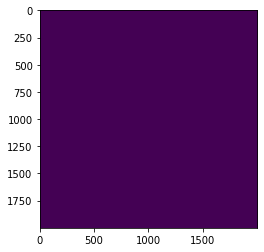

In [45]:
plt.imshow(seen_map)
plt.show()

In [66]:
hablab_topdown_map = maps.get_topdown_map(
    env.sim.pathfinder, 0.3, meters_per_pixel=meters_per_pixel
)
print(hablab_topdown_map.shape ,hablab_topdown_map.max(), hablab_topdown_map.min())

(1024, 1138) 2 0


(808, 898)


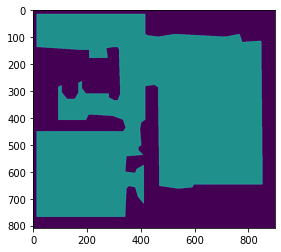

In [10]:
import numpy as np
from habitat.utils.visualizations import maps
height = 0.1
meters_per_pixel = 0.01
hablab_topdown_map = maps.get_topdown_map(
    env.sim.pathfinder, height, meters_per_pixel=meters_per_pixel
)
plt.imshow(hablab_topdown_map)
print(hablab_topdown_map.shape)
# recolor_map = np.array(
#     [[255, 255, 255], [128, 128, 128], [0, 0, 0]], dtype=np.uint8
# )
# hablab_topdown_map = recolor_map[hablab_topdown_map]
# plt.imshow(hablab_topdown_map)

In [11]:
top_down_map = maps.get_topdown_map_from_sim(
    env.sim, map_resolution=1024
)
# meters_per_pixel = maps.calculate_meters_per_pixel(map_resolution=1024, pathfinder=env.sim.pathfinder)
# print(meters_per_pixel)
# plt.imshow(top_down_map)
# im = Image.fromarray(top_down_map * 255)
# im.save(os.path.join(EXP_DIR, 'top_down_map.png'))
# local_map = np.zeros(top_down_map.shape)


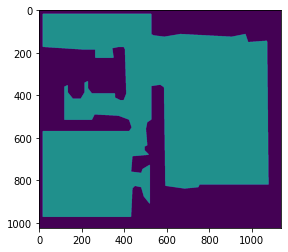

In [12]:
plt.imshow(top_down_map)

In [ ]:
env.sim.get_agent(0).get_state()

In [ ]:
env.reset()
for i in range(10000):
    env.step(env.action_space.sample())
#     if i % 500 == 0:
    plt.imshow(env.render())

